<a href="https://colab.research.google.com/github/samvardhan777/yolo-table-extraction/blob/main/Yolo_table_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralyticsplus==0.0.28 ultralytics==8.0.43

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.6/299.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=d2bfd757b6c5be2d2bf75225be5f3e11e708116a8dab1d9849db0710e6e2c403
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0.84
    Uninstalling opencv-python-4.10.0.84:
      Successfully uninstalled opencv-python-4.10.0.84


In [2]:
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO('foduucom/table-detection-and-extraction')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

# set image
image = '/content/26.jpg'

# perform inference
results = model.predict(image)

# observe results
print(results[0].boxes)
render = render_result(model=model, image=image, result=results[0])
render.show()


config.json:   0%|          | 0.00/161 [00:00<?, ?B/s]

best.pt:   0%|          | 0.00/22.5M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:340: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


tensor([[4.70000e+01, 2.25000e+02, 7.19000e+02, 8.45000e+02, 7.93856e-01, 0.00000e+00]])


In [6]:
results[0].boxes

Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
type: <class 'torch.Tensor'>
shape: torch.Size([1, 6])
dtype: torch.float32
 + tensor([[4.70000e+01, 2.25000e+02, 7.19000e+02, 8.45000e+02, 7.93856e-01, 0.00000e+00]])

In [9]:
!pip install pytesseract pandas opencv-python

Starting extraction process...
Reading image...
Detecting table...

image 1/1 /content/26.jpg: 640x480 1 bordered, 17.4ms
Speed: 7.6ms preprocess, 17.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

Detecting rows...


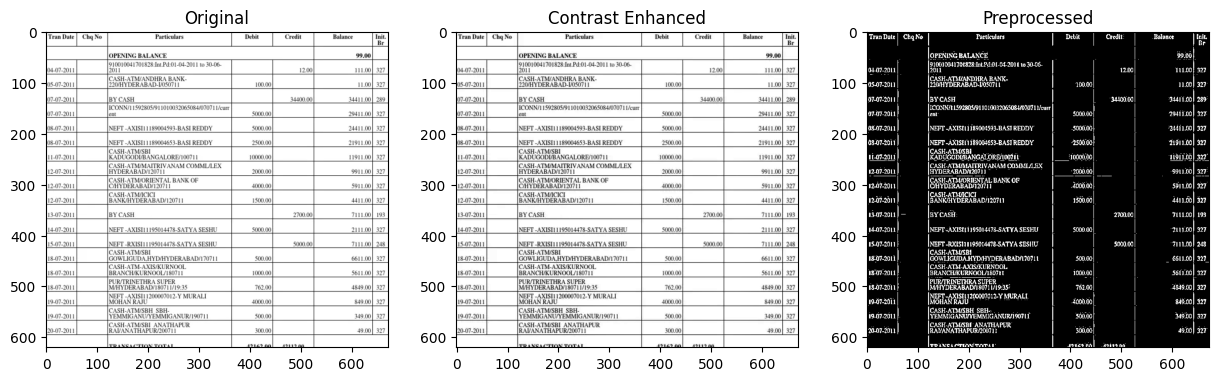

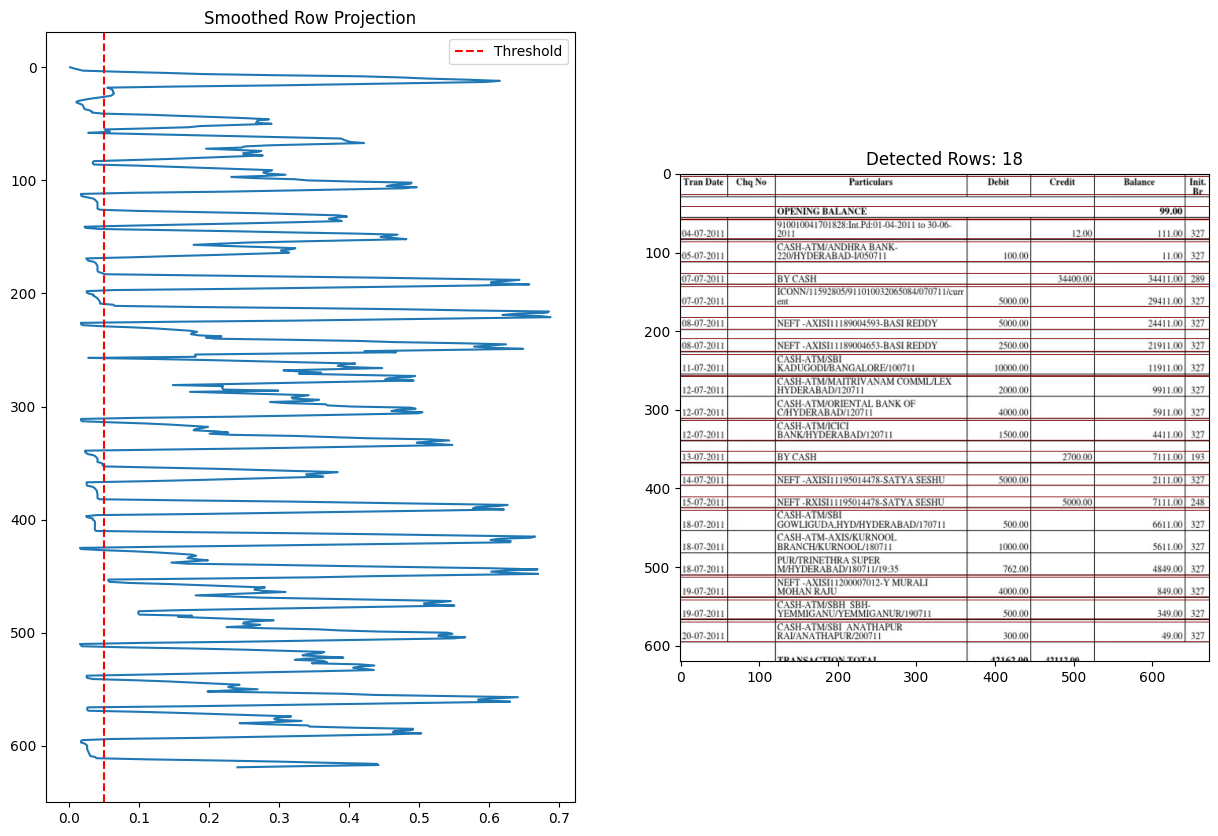

Detected 18 rows

Extracting text from rows...
Row 1: ECT) CEO |] venue || | Go | abo jib
Row 2: L. 5 OPENING BALANCE} a 5 |
Row 3: ncaa) sR PEE Cet sel
Row 4: heron «SH RATE eS aerna | — eaarall I sped lees
Row 5: amt medel Bl} i 1g 34411,001}289
Row 6: poet) «(SST le ~=—Clt(‘<ié‘dSC*é‘éir
Row 7: ere ee TSR MTEC EXE sea | AMET} i SERINE IS ee?
Row 8: Rear hay [Saabs pions, = ff || Gres 1 £9191 1.00)}927)
Row 10: ao eo = 4 | «oe
Row 11: ein] Selene |] peel I fenalen
Row 12: Meee TES eek i 1] Serer 7111.00 |)193]
Row 13: Pip sitl bee Ta ROR UPR RECON a eM OSGeo Cetra i SI eicery
Row 14: ITEM DCR eTCR Me ATEUS ET i Sell ST Get}
Row 16: Tome «dW tt pte
Row 17: Fatah,  «-«s«dWIEE Bec ae == | gama il Seidler
Row 18: Pirretel| = ATAU EEA | 3000 I axaleeey

Extracted Data:
                                                    0  \
0                 ECT) CEO |] venue || | Go | abo jib   
1                         L. 5 OPENING BALANCE} a 5 |   
2                                ncaa) sR PEE Cet se

In [12]:
import cv2
import numpy as np
import pytesseract
from ultralyticsplus import YOLO
import matplotlib.pyplot as plt
import pandas as pd

class SimpleBankExtractor:
    def __init__(self):
        self.model = YOLO('foduucom/table-detection-and-extraction')

    def preprocess_for_rows(self, image):
        """Enhanced preprocessing specifically for row detection"""
        # Convert to grayscale if needed
        if len(image.shape) == 3:
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        else:
            gray = image.copy()

        # Enhance contrast using CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        contrast = clahe.apply(gray)

        # Noise removal
        denoised = cv2.fastNlMeansDenoising(contrast)

        # Adaptive thresholding
        binary = cv2.adaptiveThreshold(
            denoised,
            255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV,
            11,
            2
        )

        # Remove horizontal lines
        horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50,1))
        horizontal_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, horizontal_kernel)
        binary = cv2.subtract(binary, horizontal_lines)

        # Display preprocessing steps
        plt.figure(figsize=(15, 5))
        plt.subplot(131)
        plt.imshow(gray, cmap='gray')
        plt.title('Original')
        plt.subplot(132)
        plt.imshow(contrast, cmap='gray')
        plt.title('Contrast Enhanced')
        plt.subplot(133)
        plt.imshow(binary, cmap='gray')
        plt.title('Preprocessed')
        plt.show()

        return binary

    def detect_rows(self, image):
        """Improved row detection"""
        # Preprocess image
        processed = self.preprocess_for_rows(image)

        # Get horizontal projection
        projection = np.sum(processed, axis=1)

        # Normalize projection
        projection = projection / np.max(projection)

        # Smooth projection
        kernel_size = 5
        kernel = np.ones(kernel_size) / kernel_size
        smoothed_projection = np.convolve(projection, kernel, mode='same')

        # Find row boundaries
        height = len(smoothed_projection)
        rows = []
        row_start = None
        min_row_height = 10  # Reduced minimum height
        threshold = 0.05     # Reduced threshold

        for i in range(height):
            if smoothed_projection[i] > threshold:
                if row_start is None:
                    row_start = i
            else:
                if row_start is not None:
                    if i - row_start > min_row_height:
                        rows.append((row_start, i))
                    row_start = None

        # Visualize detection
        row_image = image.copy()
        for start, end in rows:
            cv2.line(row_image, (0, start), (image.shape[1], start), 127, 1)
            cv2.line(row_image, (0, end), (image.shape[1], end), 127, 1)

        plt.figure(figsize=(15, 10))
        plt.subplot(121)
        plt.plot(smoothed_projection, range(height))
        plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
        plt.title('Smoothed Row Projection')
        plt.gca().invert_yaxis()
        plt.legend()

        plt.subplot(122)
        plt.imshow(row_image, cmap='gray')
        plt.title(f'Detected Rows: {len(rows)}')
        plt.show()

        return rows, processed

    def extract_text_from_row(self, row_image):
        """Extract text from a single row with improved preprocessing"""
        # Enlarge image
        row_image = cv2.resize(row_image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

        # Apply CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        contrast = clahe.apply(row_image)

        # Adaptive threshold
        binary = cv2.adaptiveThreshold(
            contrast,
            255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,
            11,
            2
        )

        # OCR with specific config
        text = pytesseract.image_to_string(
            binary,
            config='--psm 7 --oem 3'
        ).strip()

        return text

    def extract_text(self, image_path):
        try:
            print("Reading image...")
            image = cv2.imread(image_path)
            if image is None:
                raise ValueError("Could not read image")

            print("Detecting table...")
            results = self.model.predict(image_path)

            if len(results[0].boxes) == 0:
                print("No table detected")
                return None

            # Get table coordinates
            box = results[0].boxes[0]
            x1, y1, x2, y2 = map(int, box.xyxy.tolist()[0])

            # Extract table region
            table_region = image[y1:y2, x1:x2]

            # Detect rows
            print("\nDetecting rows...")
            rows, processed_image = self.detect_rows(table_region)
            print(f"Detected {len(rows)} rows")

            # Extract text from each row
            print("\nExtracting text from rows...")
            all_text = []
            for i, (start, end) in enumerate(rows):
                # Extract row image
                row_image = processed_image[start:end, :]

                # Extract text
                row_text = self.extract_text_from_row(row_image)

                if row_text:
                    print(f"Row {i+1}: {row_text}")
                    all_text.append(row_text)

            # Convert to DataFrame
            if all_text:
                # Split text into columns
                data = []
                for text in all_text:
                    # Split by multiple spaces
                    columns = [col.strip() for col in text.split('  ') if col.strip()]
                    if columns:
                        data.append(columns)

                if data:
                    df = pd.DataFrame(data)
                    print("\nExtracted Data:")
                    print(df)
                    return df

            print("No structured data could be extracted")
            return None

        except Exception as e:
            print(f"Error during extraction: {str(e)}")
            import traceback
            traceback.print_exc()
            return None

def main():
    extractor = SimpleBankExtractor()
    print("Starting extraction process...")
    image_path = '/content/26.jpg'
    result = extractor.extract_text(image_path)

    if result is not None:
        print("\nFinal Results:")
        print(result)
    else:
        print("\nExtraction failed")

if __name__ == "__main__":
    main()

In [6]:
!pip install ultralyticsplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.1/699.1 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114250 sha256=9fc701457bdaacab5e108e5c0b477e49cd134ae98f6ed4e23d4f2c42cd42f6e3
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
  Attempting uninstall: opencv-python
    Found 

In [4]:
!pip install pytesseract

In [9]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (6,024 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [8]:
!tesseract --version

/bin/bash: line 1: tesseract: command not found
